1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Global minima at (x0=[0, 0]) is: ( 0.0 , 0.0 )
Global minima at (x0=[0, 0,75]) is: ( 0.08984201020477522 , -0.7126564216963296 )
There are two global minima (0.08984201020477522 -0.7126564216963296) and (-0.08984201461662285 0.7126564044226885)


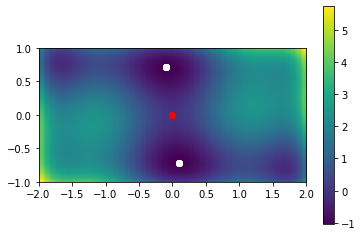

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import basinhopping
from scipy.optimize import shgo
from scipy import optimize

def f(x):
    return (4-2.1*(x[0]**2)+((x[0]**4))/3)*x[0]**2 +x[0]*x[1] + (4*x[1]**2 -4)*x[1]**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
x_, y_= np.meshgrid(x, y)
plt.imshow(f([x1, y1]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()

minima = optimize.minimize(f, x0=[0, 0])
plt.scatter(minima.x[0], minima.x[1], color='r')
print("Global minima at (x0=[0, 0]) is: (", minima.x[0],",", minima.x[1],")")

minima = optimize.minimize(f, x0=[0, -0.75])
plt.scatter(minima.x[0], minima.x[1], color='r')   
print("Global minima at (x0=[0, 0,75]) is: (", minima.x[0],",", minima.x[1],")")

for i in range(10):
    minima = basinhopping(f, x0=[0, 0])
    plt.scatter(minima.x[0], minima.x[1], color='w')
    
print("There are two global minima (0.08984201020477522 -0.7126564216963296) and (-0.08984201461662285 0.7126564044226885)")


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

[284.46967263   6.72493751   2.15552721  61.32093397]
[144.88243975   6.25725277   2.50301312 -15.77936321]
the fit is reasonable


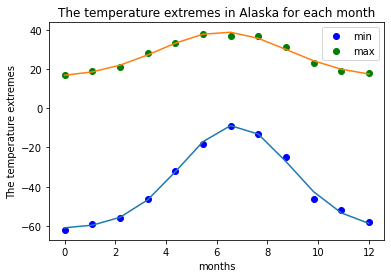

In [27]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats as stats
%matplotlib inline
def f_(x, a, mean, std,offset):
    return a * stats.norm.pdf(x,mean,std)-offset

max_temp=[17,19,21,28,33,38,37,37,31,23,19,18]
min_temp=[-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58]
months = np.linspace(0,len(max_temp),len(max_temp))
plt.plot(months,min_temp,'o',label="min", c='b')
plt.plot(months,max_temp,'o',label="max", c='g')
plt.title('The temperature extremes in Alaska for each month')
plt.ylabel('The temperature extremes')
plt.xlabel('months')

popt, pcov = optimize.curve_fit(f_, months, min_temp,p0=[10,0,1,10], full_output=False)
popt2, pcov2 = optimize.curve_fit(f_, months, max_temp,p0=[10,0,1,10], full_output=False)
print(popt)
print(popt2)
print("the fit is reasonable")
plt.plot(months, f_(months,*popt))
plt.plot(months, f_(months,*popt2))
plt.legend()
plt.show()


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

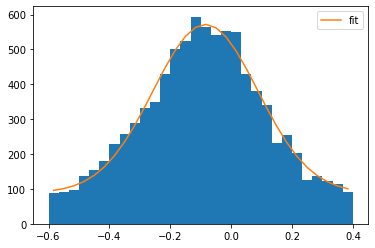

p_value: 0.0036347257759297147


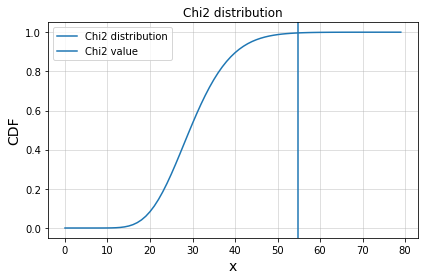

In [36]:
def f(x, a, mean, std,offset):
    return offset + (a * stats.norm.pdf(x,mean,std))

infile = pd.read_pickle('residuals_261.pkl')
new_dict = dict(infile.item())
data = pd.DataFrame(new_dict)
ni,bins,_ = plt.hist(data['residuals'],bins=np.linspace(-0.6,0.4,31) )       
poisson =  np.sqrt(np.abs(ni))
bi = 0.5*(bins[1:]+bins[:-1])
popt3, pcov3 = optimize.curve_fit(f, bi, ni, p0=[100,0,1,1], full_output=False)
plt.plot(bi,f(bi,*popt3),label="fit")
plt.legend()
plt.show()
chi2 = np.sum(((ni-f(bi,*popt3))**2)/poisson**2)
p_value = 1 - stats.chi2.cdf(chi2,len(bi))
print("p_value:",p_value)
p = np.arange(0, 80, 1)
fig2 = plt.subplots(tight_layout=True)
plt.plot(p, stats.chi2.cdf(p, df=len(bi)))
plt.fill_between(bi, ni, where=(bi > chi2))
plt.axvline(chi2)
plt.title('Chi2 distribution')
plt.xlabel('x', size=14)
plt.ylabel('CDF', size=14)
plt.legend(['Chi2 distribution', 'Chi2 value'])
plt.grid(alpha=0.5)

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

Best fit parameter are
 a:  9.999752994832567  b:  9.303913680286445  c:  9.249036549779287 

Overall average temperature in Munchen is:  9.25 

b is the phase in our function, that rappresent the phase shift between the cosein and our real function

Best fit parameter are
 a:  10.001781225472675  b:  0.9995565492483304  c:  14.903064044253453  d:  9.24471130981816


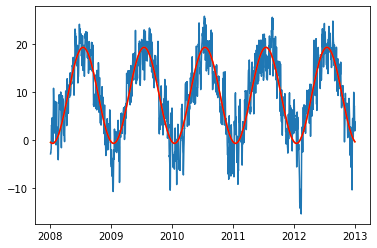

F4 vs G:
CL: 0.751 , additional parameter necessary: NO


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import basinhopping
from scipy.optimize import shgo
from scipy import optimize
from scipy.stats import f

def f4(t,a,b,c):
    return a*np.cos(2*3.14*t+b)+c

def g(t,a,b,c,d):
    return a*np.cos(2*3.14*b*t+c)+d

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


data = pd.read_csv('munich_temperatures_average_with_bad_data.txt',sep=' ', header = None)
mask = (data[1]<50) & (data[1]>-50) & (data[0]>2008) & (data[0]<2013)
clear = data[mask]
dates = clear[0]
values = clear[1]
plt.figure()
plt.plot(dates,values)
popt4, pcov4 = optimize.curve_fit(f4, dates, values, p0=[1,1,1], full_output=False)
plt.plot(dates,f4(dates,*popt4),label="fit f()",color="y")
print("Best fit parameter are\n a: ",popt4[0]," b: ",popt4[1], " c: ",popt4[2],"\n")
print("Overall average temperature in Munchen is: ",round(values.mean(),2),"\n")
print("b is the phase in our function, that rappresent the phase shift between the cosein and our real function\n")
popt5, pcov5 = optimize.curve_fit(g, dates, values, p0=[1,1,1,1], full_output=False)
plt.plot(dates,g(dates,*popt5),label="fit g()",color="r")
print("Best fit parameter are\n a: ",popt5[0]," b: ",popt5[1], " c: ",popt5[2]," d: ",popt5[3])
plt.show()

ssr_1 = np.sum((f4(dates,*popt4) - values)**2)
ssr_2 = np.sum((g(dates,*popt5) - values)**2)
N=len(dates)
print("F4 vs G:")
cl_1_vs_2 = Ftest(ssr_1, ssr_2, 3, 4, N, verbose=True)